libaries used 

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter

In [2]:
#Functions Used :
# Extracting the locations from the location

def extract_countries(location_str):
    if pd.isna(location_str) or location_str.strip().lower() == "remote":
        return ["Remote"]
    
    countries = set()
    for loc in location_str.split('|'):
        parts = loc.strip().split(',')
        if len(parts) >= 2:
            country = parts[-1].strip()
            countries.add(country)
        else:
            countries.add("Unknown")  # fallback for odd formats
    
    return list(countries)

def advanced_date_parser(series, invalid_values=None):
    if invalid_values is None:
        invalid_values = ['In Progress', 'Not Applicable', 'Unknown', '', ' ']

    def parse_single_date(val):
        if pd.isna(val) or str(val).strip() in invalid_values:
            return pd.NaT
        
        val = str(val).strip()

        try:
            # Full date (e.g., 'April 30, 2021')
            return pd.to_datetime(val, errors='raise')
        except:
            pass

        # Try to parse partial format like 'May 2021'
        try:
            match = re.match(r'^[A-Za-z]+\s+\d{4}$', val)
            if match:
                return pd.to_datetime("01 " + val, errors='coerce')
        except:
            return pd.NaT

        # If none match, return NaT
        return pd.NaT

    return series.apply(parse_single_date)
def calculate_duration(St,et):
    return ((et-St).dt.days)

def extract_intervention_types(cell):
    if pd.isna(cell):
        return []
    
    types = set()
    for item in str(cell).split('|'):
        parts = item.strip().split(':')
        if len(parts) >= 2:
            types.add(parts[0].strip())
    
    return list(types)

Importing the CSV file covid Clincal Trials and Intial exploaration of data

In [3]:
data=pd.read_csv('COVID clinical trials.csv')
data.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [4]:
data.tail()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
5778,5779,NCT04011644,Mobile Health for Alcohol Use Disorders in Cli...,NaN,Recruiting,No Results Available,Alcohol Drinking|Telemedicine,Behavioral: A-CHESS self-monitored|Behavioral:...,Number of risky drinking days|Number of patien...,"University of Wisconsin, Madison|National Inst...",...,2019-0337|R01AA024150|A532007|SMPH/FAMILY MED/...,"March 23, 2020",August 2022,April 2023,"July 8, 2019",NaN,"April 2, 2021","UW Health at the American Center, Madison, Wis...",NaN,https://ClinicalTrials.gov/show/NCT04011644
5779,5780,NCT04681339,Antibiotic Prescription in Children Hospitaliz...,NaN,Not yet recruiting,No Results Available,Community Acquired Pneumonia in Children|Antib...,Other: Antibiotic treatment|Other: No antibiot...,Antibiotic treatment rates in hospitalized chi...,ARCIM Institute Academic Research in Complemen...,...,PKA-03,April 2021,November 2024,December 2024,"December 23, 2020",NaN,"February 10, 2021","Die Filderklinik, Filderstadt, Baden-Württembe...",NaN,https://ClinicalTrials.gov/show/NCT04681339
5780,5781,NCT04740229,Moderate-intensity Flow-based Yoga Effects on ...,NaN,Recruiting,No Results Available,Stress|Psychological,Behavioral: Yoga,Perceived Stress|Task switching paradigm|Digit...,University of Illinois at Urbana-Champaign,...,21584,"February 10, 2021",July 2021,July 2021,"February 5, 2021",NaN,"February 24, 2021","University of Illinois at Urbana-Champaign, Ur...",NaN,https://ClinicalTrials.gov/show/NCT04740229
5781,5782,NCT04804917,3-year Follow-up of the Mind My Mind RCT,MindMyMindFU,Recruiting,No Results Available,Emotional Problem|Anxiety Disorder of Childhoo...,NaN,The child's impact of mental health problems r...,"Mental Health Services in the Capital Region, ...",...,"MHSCRDenmark, F-61502-03-1","March 22, 2021","May 31, 2022","December 31, 2022","March 18, 2021",NaN,"April 1, 2021","Mental Health Services in the Capital Region, ...",NaN,https://ClinicalTrials.gov/show/NCT04804917
5782,5783,NCT04680000,Chronic Pain Management In Primary Care Using ...,NaN,Not yet recruiting,No Results Available,Chronic Pain,Behavioral: Brief Cognitive Behavioral Therapy...,Defense and Veterans Pain Rating Scale (DVPRS)...,The University of Texas Health Science Center ...,...,HSC20200520H,February 2021,February 2024,February 2025,"December 22, 2020",NaN,"December 22, 2020",Uniformed Services University for the Health S...,NaN,https://ClinicalTrials.gov/show/NCT04680000


In [5]:
data.describe()

,Rank,Enrollment
count,5783.000000,5.749000e+03
mean,2892.000000,1.831949e+04
std,1669.552635,4.045437e+05
min,1.000000,0.000000e+00
25%,1446.500000,6.000000e+01
50%,2892.000000,1.700000e+02
75%,4337.500000,5.600000e+02
max,5783.000000,2.000000e+07


In [6]:
data.shape

(5783, 27)

Data Cleaning

using isnull function check for null values

In [7]:
data.isnull().sum()

Rank                          0
NCT Number                    0
Title                         0
Acronym                    3303
Status                        0
Study Results                 0
Conditions                    0
Interventions               886
Outcome Measures             35
Sponsor/Collaborators         0
Gender                       10
Age                           0
Phases                     2461
Enrollment                   34
Funded Bys                    0
Study Type                    0
Study Designs                35
Other IDs                     1
Start Date                   34
Primary Completion Date      36
Completion Date              36
First Posted                  0
Results First Posted       5747
Last Update Posted            0
Locations                   585
Study Documents            5601
URL                           0
dtype: int64

Dropping colunms Acronym,Results First Posted,Study Documents 

In [8]:
data= data.drop(columns=['Acronym','Study Documents','Results First Posted'],errors='ignore')
data.head()

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,Interventional,Allocation: N/A|Intervention Model: Single Gro...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,Interventional,Allocation: Randomized|Intervention Model: Par...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,Observational,Observational Model: Cohort|Time Perspective: ...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,Observational,Observational Model: Cohort|Time Perspective: ...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,Observational,Observational Model: Cohort|Time Perspective: ...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924


Filling in missing Phase info with "Not Applicable“
Filling in  missing Enrollment with 0 
converting valid date strings to actual datetime objects, and turn invalid or missing dates into NaT (pandas’ “Not a Time” value).

In [9]:
data['Phases']=data['Phases'].fillna('Not Applicable')
data['Enrollment']=data['Enrollment'].fillna(0)
data['Completion Date']=advanced_date_parser(data['Completion Date'])
data['Primary Completion Date']=advanced_date_parser(data['Primary Completion Date'])
data['Start Date']=advanced_date_parser(data['Start Date'])
data.head()

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Study Type,Study Designs,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,Interventional,Allocation: N/A|Intervention Model: Single Gro...,COVID-IDNow,2020-11-09,2020-12-22,2021-04-30,"March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,Interventional,Allocation: Randomized|Intervention Model: Par...,COVID19-0001-USR,2020-11-02,2020-12-15,2021-01-29,"October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,Observational,Observational Model: Cohort|Time Perspective: ...,TAC-COVID19,2020-05-07,2021-06-15,2021-06-15,"May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,Observational,Observational Model: Cohort|Time Perspective: ...,RC-2020-08,2020-05-25,2020-07-31,2020-08-31,"June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,Observational,Observational Model: Cohort|Time Perspective: ...,CHRO-2020-10,2020-05-05,2021-05-01,2021-05-01,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924


Verify null values again

In [10]:
data.isnull().sum()

Rank                         0
NCT Number                   0
Title                        0
Status                       0
Study Results                0
Conditions                   0
Interventions              886
Outcome Measures            35
Sponsor/Collaborators        0
Gender                      10
Age                          0
Phases                       0
Enrollment                   0
Funded Bys                   0
Study Type                   0
Study Designs               35
Other IDs                    1
Start Date                  34
Primary Completion Date     36
Completion Date             36
First Posted                 0
Last Update Posted           0
Locations                  585
URL                          0
dtype: int64

Removing rows with empty values in interventions, gender, outcome measures

In [11]:

data.dropna(subset=['Interventions','Outcome Measures','Gender','Study Designs','Other IDs','Start Date','Primary Completion Date','Completion Date'],inplace=True)
data['Locations']=data['Locations'].fillna("Remote")
data.isnull().sum()

Rank                       0
NCT Number                 0
Title                      0
Status                     0
Study Results              0
Conditions                 0
Interventions              0
Outcome Measures           0
Sponsor/Collaborators      0
Gender                     0
Age                        0
Phases                     0
Enrollment                 0
Funded Bys                 0
Study Type                 0
Study Designs              0
Other IDs                  0
Start Date                 0
Primary Completion Date    0
Completion Date            0
First Posted               0
Last Update Posted         0
Locations                  0
URL                        0
dtype: int64

In [12]:
# checking for duplicates in the records
data.duplicated().sum()

np.int64(0)

In [13]:
#Extracting countries from the Location
data['Countries'] =data['Locations'].apply(extract_countries)
data['Countries'].head()

0               [France]
1             [Colombia]
2    [Italy, San Marino]
3            [Hong Kong]
4               [France]
Name: Countries, dtype: object

In [14]:
#Caluculating duration from Start and End
data['Duration']=calculate_duration(data['Start Date'],data['Completion Date'])
data.columns

Index(['Rank', 'NCT Number', 'Title', 'Status', 'Study Results', 'Conditions',
       'Interventions', 'Outcome Measures', 'Sponsor/Collaborators', 'Gender',
       'Age', 'Phases', 'Enrollment', 'Funded Bys', 'Study Type',
       'Study Designs', 'Other IDs', 'Start Date', 'Primary Completion Date',
       'Completion Date', 'First Posted', 'Last Update Posted', 'Locations',
       'URL', 'Countries', 'Duration'],
      dtype='object')

In [15]:
data['Interventions Types']=data['Interventions'].apply(extract_intervention_types)
data.head()

,Rank,NCT Number,Title,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,Gender,...,Start Date,Primary Completion Date,Completion Date,First Posted,Last Update Posted,Locations,URL,Countries,Duration,Interventions Types
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,All,...,2020-11-09,2020-12-22,2021-04-30,"March 8, 2021","March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",https://ClinicalTrials.gov/show/NCT04785898,[France],172,[Diagnostic Test]
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,All,...,2020-11-02,2020-12-15,2021-01-29,"October 20, 2020","October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",https://ClinicalTrials.gov/show/NCT04595136,[Colombia],88,[Drug]
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,All,...,2020-05-07,2021-06-15,2021-06-15,"May 20, 2020","November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",https://ClinicalTrials.gov/show/NCT04395482,"[Italy, San Marino]",404,[Other]
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,All,...,2020-05-25,2020-07-31,2020-08-31,"June 4, 2020","June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",https://ClinicalTrials.gov/show/NCT04416061,[Hong Kong],98,[Diagnostic Test]
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,Female,...,2020-05-05,2021-05-01,2021-05-01,"May 20, 2020","June 4, 2020","CHR Orléans, Orléans, France",https://ClinicalTrials.gov/show/NCT04395924,[France],361,[Diagnostic Test]


Which countries have the most trials?

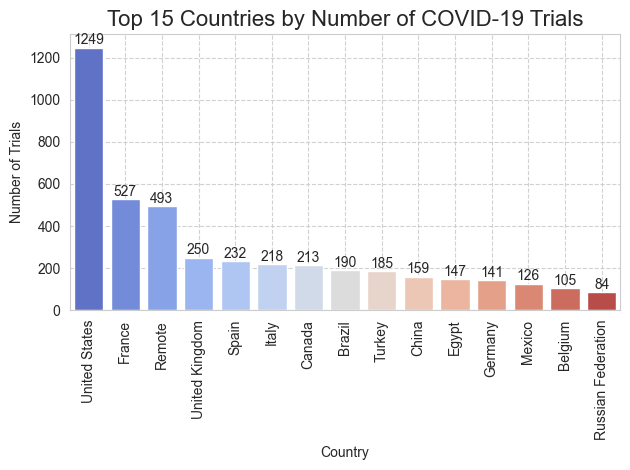

In [36]:


# Flatten the list of country lists
all_countries = [country for sublist in data['Countries'] for country in sublist]
country_count = Counter(all_countries)

# Convert to DataFrame and get top 15
top15_df = pd.DataFrame(country_count.items(), columns=['Country', 'Count'])
top15_df = top15_df.sort_values(by='Count', ascending=False).head(15)

# Plotting
sns.set_style('whitegrid')
# plt.figure(figsize=(12, 7))
plt.title("Top 15 Countries by Number of COVID-19 Trials", fontsize=16)

# Barplot with hue same as x just for coloring
ax = sns.barplot(data=top15_df, x='Country', y='Count', hue='Country', dodge=False, palette='coolwarm')

# Remove the legend since hue is same as x


# Add labels above bars
for bar in ax.patches:
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f'{int(height)}',
        ha='center', va='bottom', fontsize=10
    )

# Customize
plt.ylabel("Number of Trials")
plt.xticks(rotation=90)
plt.grid(True, linestyle="--", alpha=0.9)
plt.tight_layout()
plt.savefig('Top 15 Countries by Number of COVID-19 Trials.png', dpi=300, bbox_inches='tight')
plt.show()

Most commonly used Intervention

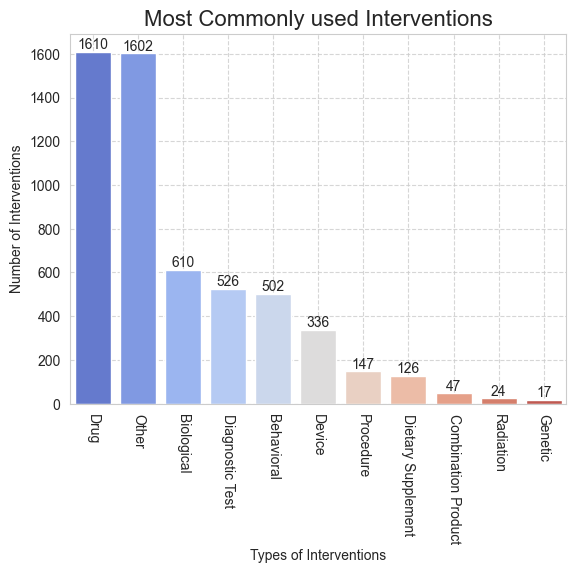

In [ ]:
all_intervenion = [item for items in data['Interventions Types'] for item in items]
intervention_count = Counter(all_intervenion)
mc=pd.DataFrame(intervention_count.items(),columns=['type','count'])
mc=mc.sort_values(by='count', ascending=False)


sns.set_style('whitegrid')
# plt.figure(figsize=(12, 7))
plt.title("Most Commonly used Interventions", fontsize=16)

ax = sns.barplot(data=mc,x='type',y='count',hue="type",palette='coolwarm')

for bar in ax.patches:
    height=bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        height + 1,
        f'{int(height)}',
        ha="center",va="bottom",fontsize=10
    )
plt.ylabel('Number of Interventions')
plt.xlabel('Types of Interventions')
plt.xticks(rotation=-90)
plt.grid(True,linestyle="--",alpha=0.8)
plt.savefig("Most Commonly used Interventions",dpi=300,bbox_inches='tight')
plt.show()



Interventions used in top 10 countries

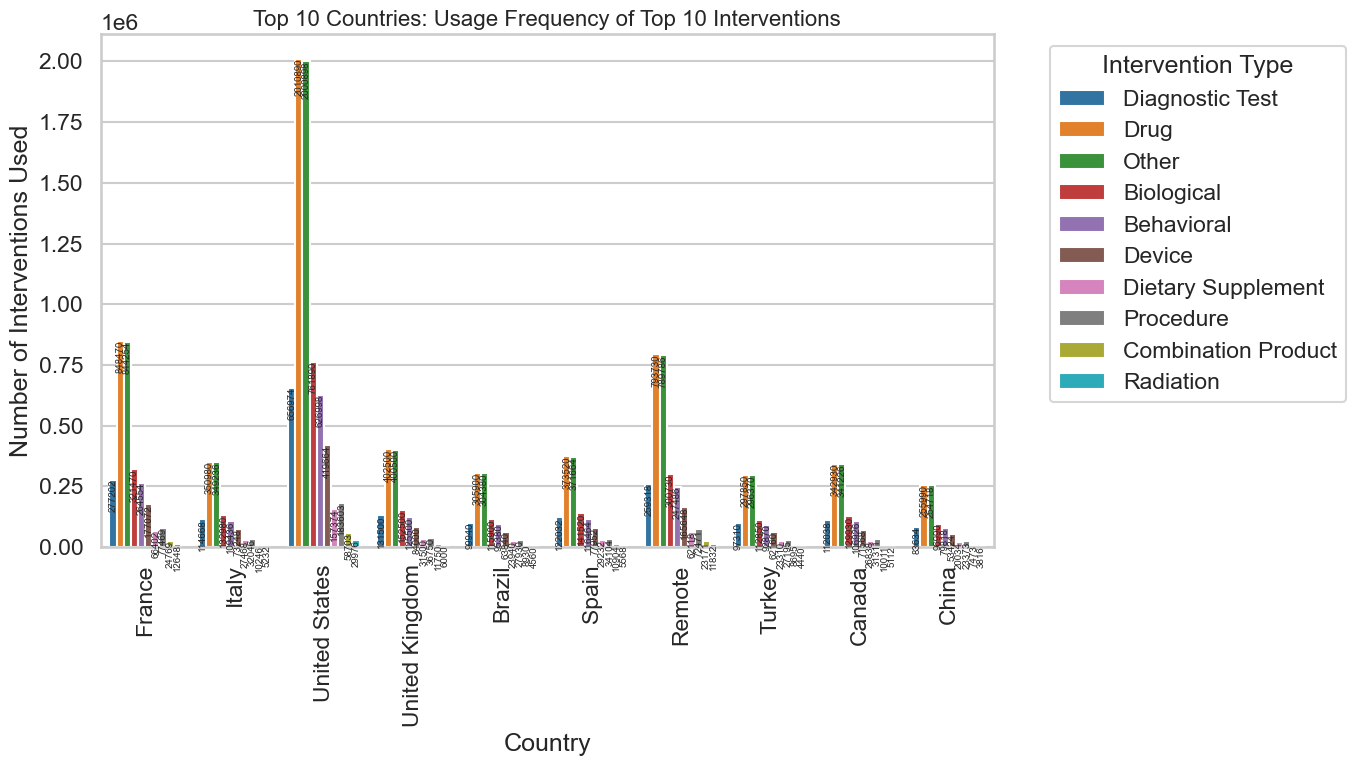

In [182]:
from collections import Counter, defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Flatten the list and get top 10 countries
all_countries = [country for sublist in data['Countries'] for country in sublist]
country_count = Counter(all_countries)
top10_countries = [c for c, _ in country_count.most_common(10)]

# Step 2: Create mapping of Country -> Interventions
country_intervention_map = defaultdict(list)
for idx, countries in enumerate(data['Countries']):
    interventions = data['Interventions Types']
    for country in countries:
        if country in top10_countries:
            country_intervention_map[country].extend(interventions)

# Step 3: Count interventions per country
intervention_data = []

for country, interventions in country_intervention_map.items():
    all_intervenion = [item for items in interventions for item in items]
    counter = Counter(all_intervenion)
    for intervention, count in counter.items():
        intervention_data.append({
            'Country': country,
            'Intervention': intervention,
            'Count': count
        })

df = pd.DataFrame(intervention_data)

# Optional: Filter to top N interventions across all for readability
top_interventions = df.groupby('Intervention')['Count'].sum().sort_values(ascending=False).head(10).index
df = df[df['Intervention'].isin(top_interventions)]

# Step 4: Plot
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
plt.title("Top 10 Countries: Usage Frequency of Top 10 Interventions", fontsize=16)

ax = sns.barplot(data=df, x='Country', y='Count', hue='Intervention', palette='tab10')

# Add labels
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 1,
            f'{int(height)}',
            ha='center', va='top', fontsize=7,rotation=90,
        )

plt.ylabel('Number of Interventions Used')
plt.xlabel('Country')
plt.legend(title='Intervention Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('Top10_Countries_vs_Top10_Interventions.png', dpi=700, bbox_inches='tight')
plt.show()


What is the status distribution of these trials

<function matplotlib.pyplot.show(close=None, block=None)>

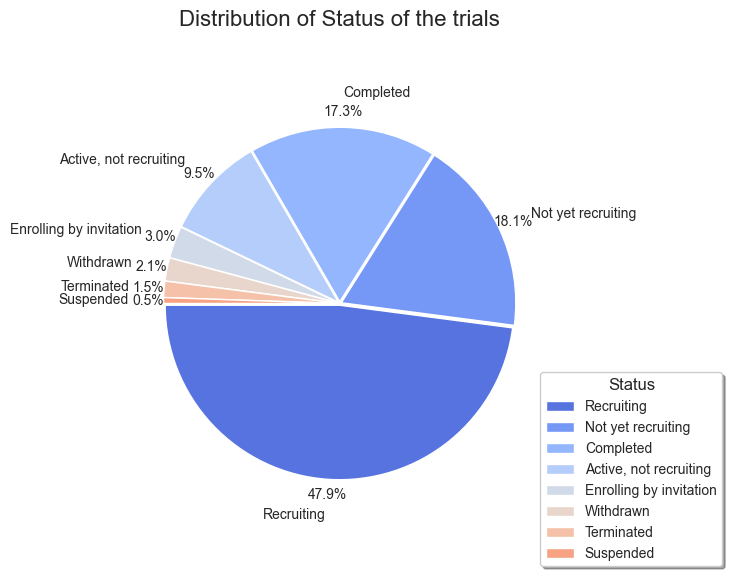

In [110]:
sns.set_style('whitegrid')
plt.figure(figsize=[5,7])
colors = sns.color_palette("coolwarm", n_colors=10) 
plt.pie(data["Status"].value_counts(),labels=data['Status'].value_counts().index,colors=colors,autopct='%1.1f%%',startangle=-180,labeldistance=1.2,pctdistance=1.089,explode=[0.01]*len(data['Status'].value_counts().values) )
plt.title("Distribution of Status of the trials",fontsize=16)
plt.axis('equal')

plt.legend(
    data['Status'].value_counts().index,
    title="Status",
    loc='lower left',
    bbox_to_anchor=(1, 0),
    shadow=True,
    fancybox=True,
    fontsize='medium',
    title_fontsize='large'
)
plt.savefig("Distribution of Status of the trials",dpi=300,bbox_inches="tight")
plt.show

Number of trials conducted in each Year from 2019 to 2021

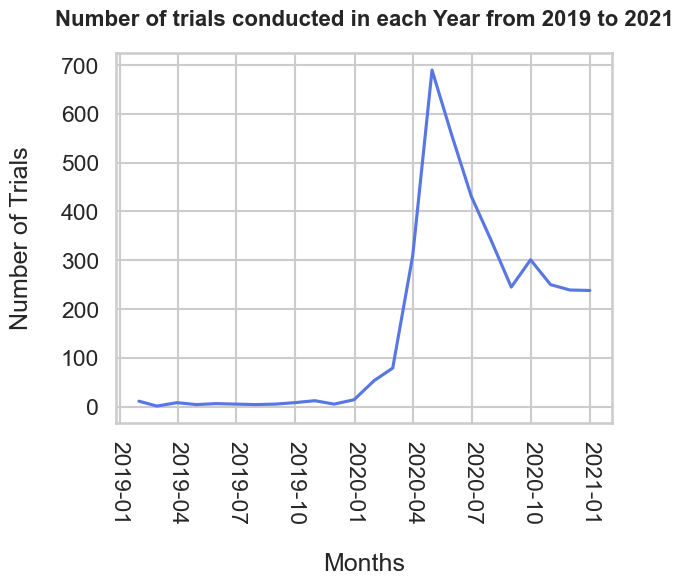

In [188]:
#Number Trials conducted in each year

# data['Start Year'] = data['Start Date'].dt.year
# year_counts = data['Start Year'].value_counts().sort_index()
# year_counts

monthly_counts = data.resample('ME',on = 'Start Date')['NCT Number'].count()
# print(monthly_counts['2019':'2021'])
monthly_counts = monthly_counts.reset_index()
monthly_counts.columns = ['Months', 'Trials']

plt.Figure(figsize=[5,7])
color = sns.color_palette("coolwarm", as_cmap=True)(0.1) 
sns.set_style('whitegrid')


sns.lineplot(data=monthly_counts[monthly_counts['Months'].between('2019','2021')],x='Months',y='Trials', markers="o",color=color)
plt.xticks(rotation=-90)
plt.title("Number of trials conducted in each Year from 2019 to 2021",fontsize=16, weight='bold', pad=20)
plt.ylabel("Number of Trials",labelpad=20)
plt.xlabel("Months",labelpad=20)
plt.savefig("Number of trials conducted in each Year from 2019 to 2021",dpi=300,bbox_inches="tight")
plt.show()


In [176]:
data['Conditions'].value_counts()['Covid19']
y=data
count_condtions =[ item.strip().lower() for items in data['Conditions'] for item in items.split("|") ]
condition = Counter(count_condtions)
print(condition)

Counter({'covid19': 1272, 'covid-19': 1247, 'covid': 259, 'corona virus infection': 170, 'coronavirus': 161, 'coronavirus infection': 154, 'sars-cov-2': 150, 'sars-cov infection': 131, 'sars-cov2': 130, 'sars-cov 2': 106, 'acute respiratory distress syndrome': 82, 'sars-cov-2 infection': 79, 'anxiety': 76, 'covid 19': 73, 'pneumonia, viral': 72, 'ards': 67, 'pneumonia': 64, 'depression': 63, 'covid-19 infection': 43, 'cancer': 43, 'respiratory failure': 41, 'coronavirus infections': 39, 'covid-19 pneumonia': 38, 'severe acute respiratory syndrome coronavirus 2': 37, 'severe acute respiratory syndrome': 36, 'stress': 36, 'sars (severe acute respiratory syndrome)': 34, 'ards, human': 34, 'critical illness': 33, 'quality of life': 32, 'healthy': 29, 'cytokine storm': 22, 'cardiovascular diseases': 22, 'coronavirus disease 2019': 20, 'stress, psychological': 20, 'hypertension': 19, 'coronavirus disease 2019 (covid-19)': 18, 'acute kidney injury': 18, 'infection viral': 18, 'pregnancy relat

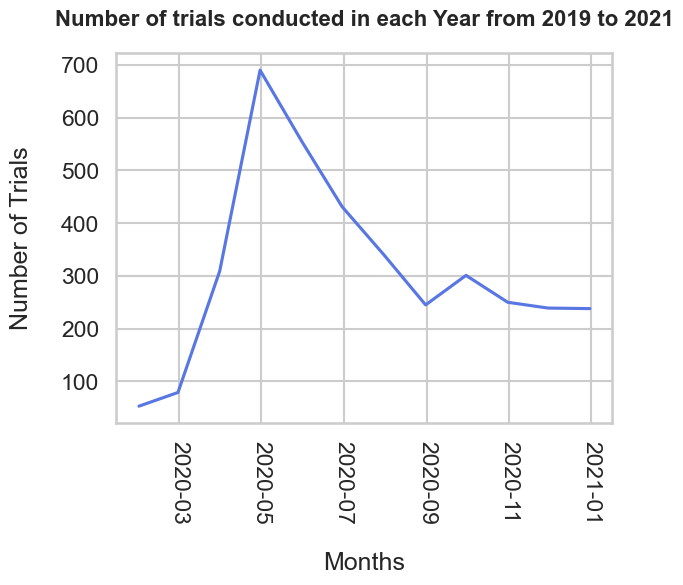

In [198]:
monthly_counts = data.resample('ME',on = 'Start Date')['NCT Number'].count()
# print(monthly_counts['2019':'2021'])
monthly_counts = monthly_counts.reset_index()
monthly_counts.columns = ['Months', 'Trials']

plt.Figure(figsize=[5,7])
color = sns.color_palette("coolwarm", as_cmap=True)(0.1) 
sns.set_style('whitegrid')


sns.lineplot(data=monthly_counts[monthly_counts['Months'].dt.year == 2020],x='Months',y='Trials', markers="o",color=color)
plt.xticks(rotation=-90)
plt.title("Number of trials conducted in each Year from 2019 to 2021",fontsize=16, weight='bold', pad=20)
plt.ylabel("Number of Trials",labelpad=20)
plt.xlabel("Months",labelpad=20)
# plt.savefig("Number of trials conducted in each Year from 2019 to 2021",dpi=300,bbox_inches="tight")
plt.show()

data.head()

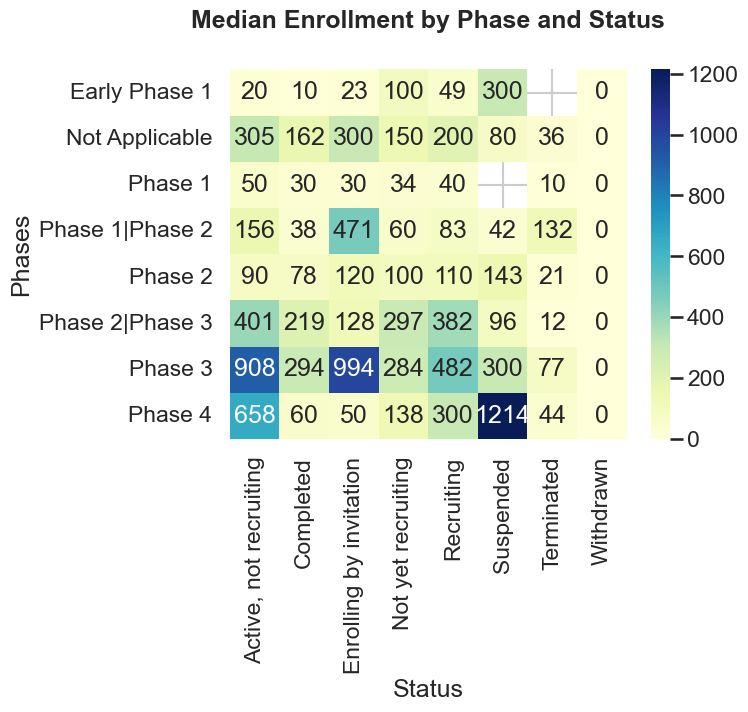

In [207]:
heat = data.pivot_table(index='Phases', columns='Status', values='Enrollment', aggfunc='median')
sns.heatmap(heat, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title("Median Enrollment by Phase and Status",pad=30,fontsize=18,weight='bold')
plt.show()

adding the customisation and same as a dulipcate file

In [211]:
data.to_csv("After_Custom_Covid",index=False)

Adding Ebola and Nipha virus to case study

In [ ]:
Data1 = pd.read_csv('ebola.csv')
Data2 = pd.read_csv('NCT05178901.csv')